<a href="https://colab.research.google.com/github/djasantos/PhD/blob/master/sincronizaDadosACSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importar bibliotecas
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [39]:
# Ler detaset : QACSM_C4_60m_2019STP.xlsx
acsmDF = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Colaborações/Fernando Morais/Dados Fernando/QACSM_C4_60m_2019STP.xlsx').rename(
    columns={'Organics (ug/m3)':'organics'}).set_index('Time (UTC)')
acsmDF.head()

,organics,sulfate,nitrate,ammonium,chloride
Time (UTC),,,,,
2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
2019-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN
2019-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN


In [34]:
# Timestamp filtros (Fernando Morais)
filterTime = [
    '01/04-04/04/2019',
    '09/04-15/04/2019',
    '20/04-26/04/2019',
    '07/05-14/05/2019',
    '14/08-21/08/2019',
    '11/09-20/09/2019',
    '03/10-10/10/2019',
    '26/10-31/10/2019']
# Converter strings para datetime.datetime 
deltaFilter = []
for string in filterTime:
  aux = string.split("-")
  end = dt.datetime.strptime(aux[1], '%d/%m/%Y')
  start = dt.datetime.strptime(aux[0]+'/'+str(end.year),'%d/%m/%Y')
  deltaFilter.append([start,end])

In [65]:
# Sincroniza dataset original para Timestamp dos filtros
syncACSM = pd.DataFrame({'organics' : [],'sulfate' : [],'nitrate' : [],
                         'ammonium' : [],'chloride' : []})
for intervalo in deltaFilter:
  dummyTime = acsmDF.index
  condition = (dummyTime > intervalo[0]) & (dummyTime < intervalo[1])
  indices = dummyTime[condition]
  syncACSM = syncACSM.append({'organics':acsmDF.loc[indices]['organics'].mean(),
                   'sulfate':acsmDF.loc[indices]['sulfate'].mean(),
                   'nitrate':acsmDF.loc[indices]['nitrate'].mean(),
                   'ammonium':acsmDF.loc[indices]['ammonium'].mean(),
                   'chloride':acsmDF.loc[indices]['chloride'].mean(),
                   'timeFilter': intervalo[0] + (intervalo[1]-intervalo[0])/2},
                   ignore_index=True) 
syncACSM = syncACSM.set_index('timeFilter')

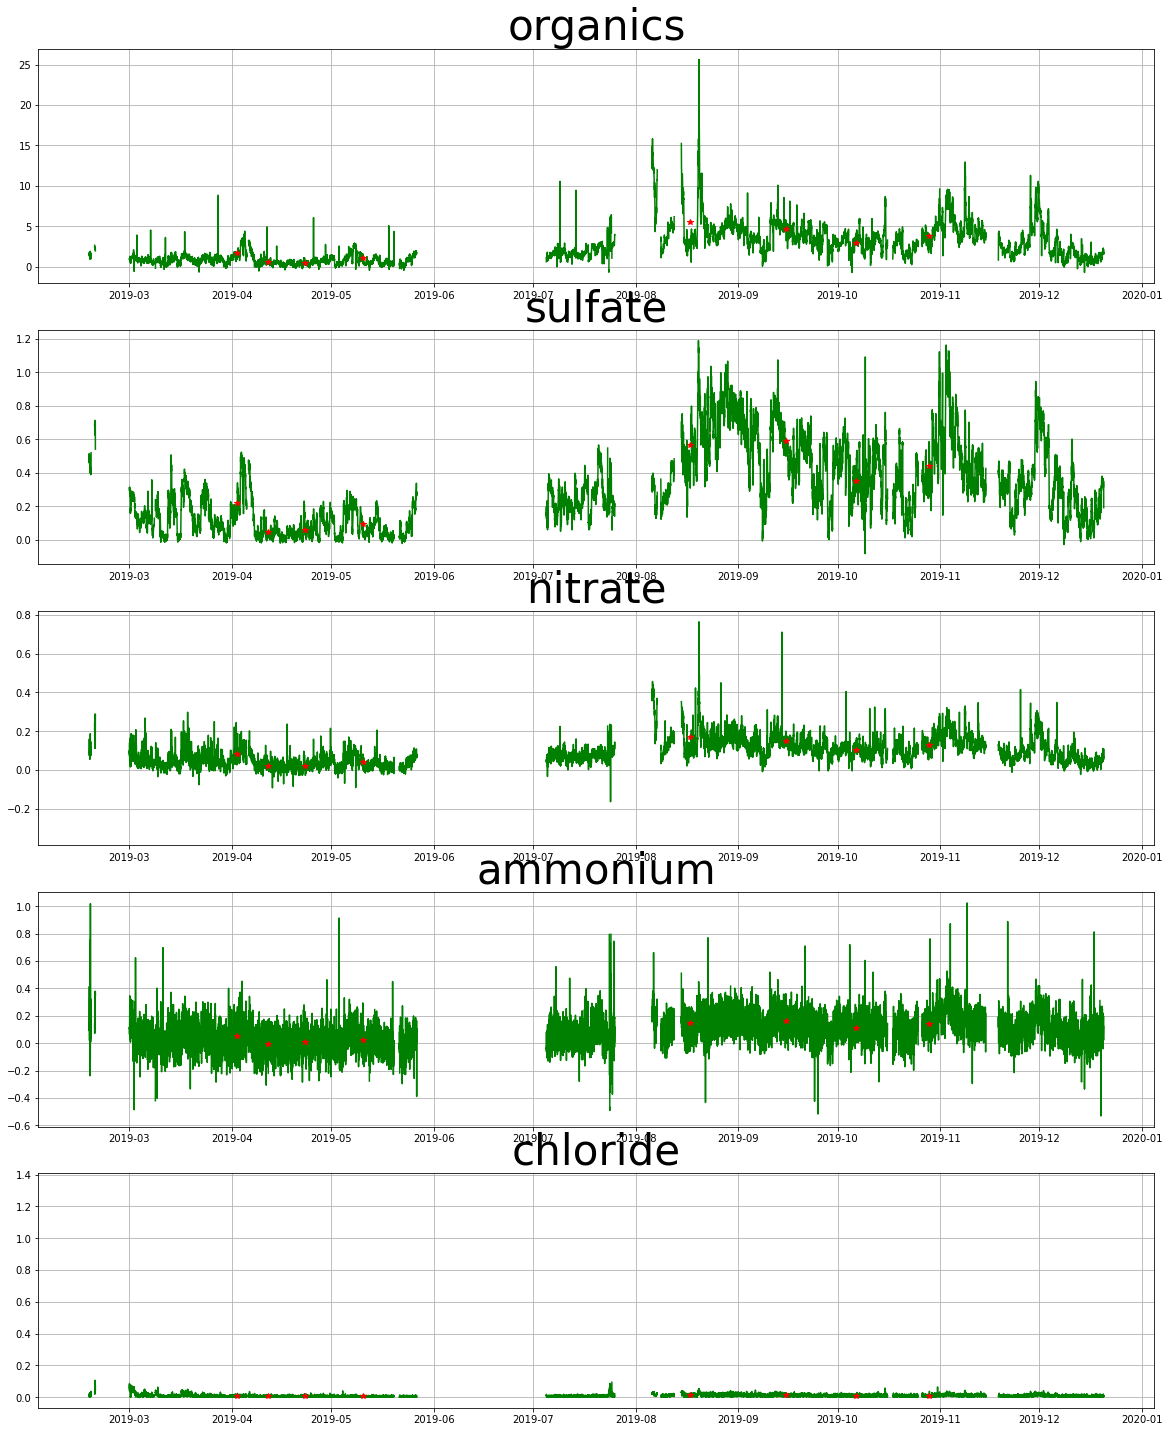

In [97]:
fig, ax = plt.subplots(5,figsize=(20,25))
# Plots 
for especie, i in zip(['organics','sulfate','nitrate','ammonium','chloride'],range(5)):
  ax[i].plot(acsmDF[especie],'g')
  ax[i].plot(syncACSM[especie],'r*')
  ax[i].set_title(especie,fontsize=42)
  ax[i].grid()